In [1]:
import pandas as pd
import numpy as np
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import os
import matplotlib.gridspec as gridspec


# Load datasets

In [2]:
DATA_PATH = os.path.join(os.getcwd(),'data')
EVENTS_PATH = os.path.join(DATA_PATH,'events')
df_events = pd.read_feather(EVENTS_PATH)

# Get all passes for Samuel Eto

In [3]:
df_pass = df_events[df_events.type_name=='Pass'].copy()
df_pass = df_pass[['id','player_id','player_name','pass_assisted_shot_id',
                   'x', 'y', 'pass_end_x', 'pass_end_y']].copy()
df_pass = df_pass[df_pass.player_id==19298].copy()

# Get all shots and merge onto shots onto passes for outcomes

In [5]:
df_shot = df_events[df_events.type_name=='Shot'].dropna(axis=1,how='all').copy()
df_shot = df_shot[['id','shot_statsbomb_xg','shot_outcome_name']].copy()
df_shot = df_shot.rename({'id':'pass_assisted_shot_id'},axis=1)

In [6]:
df_pass = df_pass.merge(df_shot,on='pass_assisted_shot_id',how='left')
# add assist column and drop shot outcome
df_pass['assist'] = df_pass['shot_outcome_name'] == 'Goal'
df_pass.drop('shot_outcome_name',axis=1,inplace=True)

In [7]:
df_pass.head()

,id,player_id,player_name,pass_assisted_shot_id,x,y,pass_end_x,pass_end_y,shot_statsbomb_xg,assist
0,e5d59a40-2805-4120-9f32-67f0653bcf96,19298.0,"Samuel Eto""o Fils",None,107.7,47.5,104.6,47.1,NaN,False
1,040bebf4-5379-46f6-bc4f-da0a893d96a1,19298.0,"Samuel Eto""o Fils",e17f4495-d393-4834-825a-993ab03efaa4,83.1,39.3,85.3,53.1,0.036634,False
2,5ae3137f-75b1-4305-8056-e3d5df1855fb,19298.0,"Samuel Eto""o Fils",None,53.2,50.9,40.2,54.0,NaN,False
3,4e0f998f-9098-4df9-b8fb-43b71496d653,19298.0,"Samuel Eto""o Fils",None,46.2,42.4,40.5,43.9,NaN,False
4,6f4052d2-dabf-4c84-a1b8-4b0744ca277e,19298.0,"Samuel Eto""o Fils",None,84.1,37.9,100.6,19.3,NaN,False


# Subset the data for the lines and shots (assist/ or other)

In [14]:
#boolean mask for assists or high xg. Use this to subset data
mask_line = (df_pass.assist==True)|(df_pass.shot_statsbomb_xg>=0.1)
df_line = df_pass[mask_line].copy()
# boolean mask for assists. Use this to subset data
mask_assist = (mask_line) & (df_pass.assist==True)
df_assist = df_pass[mask_assist].copy()
# booelan mask for other passes (no assist/goal). Use this to subset data
mask_other = (mask_line) & (df_pass.assist==False)
df_other = df_pass[mask_other].copy()

# Plot the data

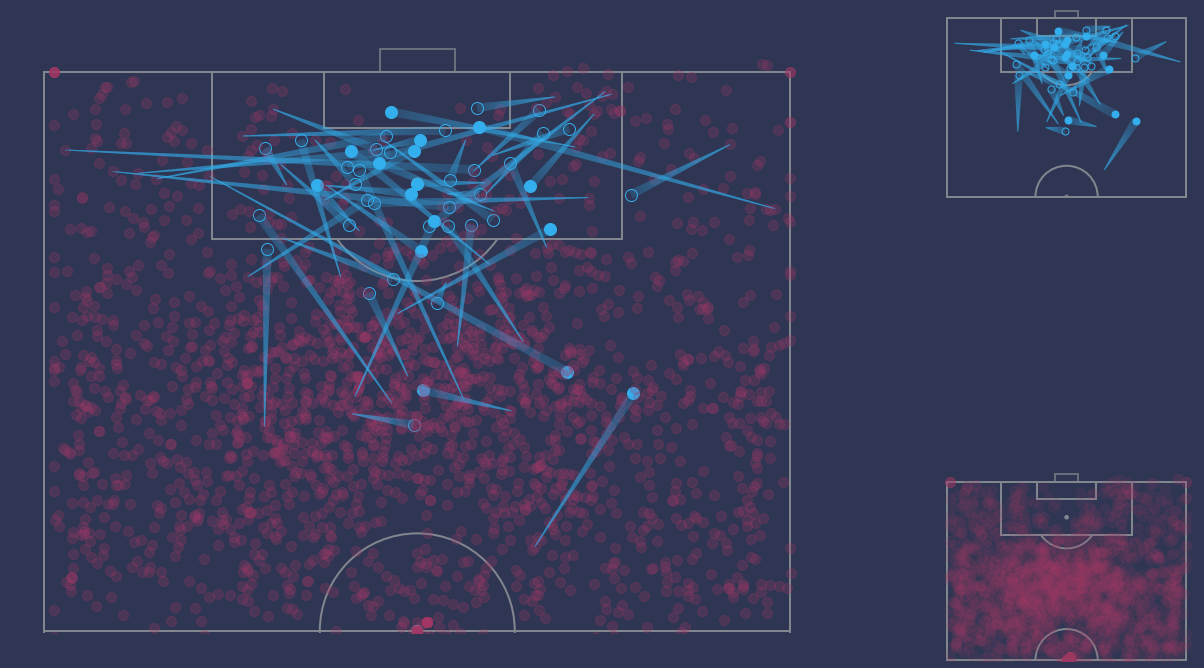

In [16]:
pad = 1/72
figsize1 = 1536/72
figsize2 = 1125/72
fig = plt.figure(figsize=(figsize1, figsize2),facecolor='#2f3653') 
gs = gridspec.GridSpec(2, 2, width_ratios=[3.13, 1])
ax1 = plt.subplot(gs[:, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 1])
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),
              pitch_color='#2f3653',line_color='#82868f',goal_type='box',linewidth=2,
              pad_bottom=0.2,pad_top=4)
pitch.draw(ax1)
pitch.draw(ax2)
pitch.draw(ax3)
#plot lines
pitch.lines(df_line.x,df_line.y,df_line.pass_end_x,df_line.pass_end_y,
            lw=9,transparent=True,comet=True,zorder=3,ax=ax1)
pitch.lines(df_line.x,df_line.y,df_line.pass_end_x,df_line.pass_end_y,
            lw=9,transparent=True,comet=True,zorder=3,ax=ax2)
# plot assists
pitch.plot(df_assist.pass_end_x,df_assist.pass_end_y,
           marker='o', color='None',markersize=12,markerfacecolor='#34afed',
           linestyle='None',markeredgecolor='#34afed',ax=ax1)
pitch.plot(df_assist.pass_end_x,df_assist.pass_end_y,
           marker='o', color='None',markersize=7,markerfacecolor='#34afed',
           linestyle='None',markeredgecolor='#34afed',ax=ax2)
# plot other
pitch.plot(df_other.pass_end_x,df_other.pass_end_y, 
           marker='o', color='None',markersize=12,linestyle='None',markeredgecolor='#34afed',ax=ax1)
pitch.plot(df_other.pass_end_x,df_other.pass_end_y,
           marker='o', color='None',markersize=7,linestyle='None',markeredgecolor='#34afed',ax=ax2)
# plot pass start locations
pitch.plot(df_pass.x,df_pass.y,
           marker='o', color='#a43967',markersize=10,alpha=0.25,linestyle='None',ax=ax1)
pitch.plot(df_pass.x,df_pass.y,
           marker='o', color='#a43967',markersize=10,alpha=0.1,linestyle='None',ax=ax3)